Install all necessary packages. 
Should only be done first time for notebook.

In [14]:
# install.packages('tree', repos='http://cran.us.r-project.org')
# install.packages('ISLR', repos='http://cran.us.r-project.org')
# install.packages('MASS', repos='http://cran.us.r-project.org')
# install.packages('randomForest', repos='http://cran.us.r-project.org')
# install.packages('gbm', repos='http://cran.us.r-project.org')

**Fitting classification trees**

In [1]:
library(tree)
library(ISLR)

Warning message:
"package 'tree' was built under R version 3.5.3"Warning message:
"package 'ISLR' was built under R version 3.5.3"

We use the carseat dataset.
We create a binary variable high / low, if Sales <= 8 or > 8.

In [2]:
attach(Carseats)
High=ifelse(Sales<=8,"No","Yes")
Carseats=data.frame(Carseats,High)

The Carseats data set tracks sales information for child car seats. 
It has 400 observations (each at a different store) and 11 variables:

* Sales: unit sales in thousands
* CompPrice: price charged by competitor at each location
* Income: community income level in 1000s of dollars
* Advertising: local ad budget at each location in 1000s of dollars
* Population: regional pop in thousands
* Price: price for car seats at each site
* ShelveLoc: Bad, Good or Medium indicates quality of shelving location
* Age: age level of the population
* Education: ed level at location
* Urban: Yes/No
* US: Yes/No

In [3]:
summary(Carseats)

     Sales          CompPrice       Income        Advertising    
 Min.   : 0.000   Min.   : 77   Min.   : 21.00   Min.   : 0.000  
 1st Qu.: 5.390   1st Qu.:115   1st Qu.: 42.75   1st Qu.: 0.000  
 Median : 7.490   Median :125   Median : 69.00   Median : 5.000  
 Mean   : 7.496   Mean   :125   Mean   : 68.66   Mean   : 6.635  
 3rd Qu.: 9.320   3rd Qu.:135   3rd Qu.: 91.00   3rd Qu.:12.000  
 Max.   :16.270   Max.   :175   Max.   :120.00   Max.   :29.000  
   Population        Price        ShelveLoc        Age          Education   
 Min.   : 10.0   Min.   : 24.0   Bad   : 96   Min.   :25.00   Min.   :10.0  
 1st Qu.:139.0   1st Qu.:100.0   Good  : 85   1st Qu.:39.75   1st Qu.:12.0  
 Median :272.0   Median :117.0   Medium:219   Median :54.50   Median :14.0  
 Mean   :264.8   Mean   :115.8                Mean   :53.32   Mean   :13.9  
 3rd Qu.:398.5   3rd Qu.:131.0                3rd Qu.:66.00   3rd Qu.:16.0  
 Max.   :509.0   Max.   :191.0                Max.   :80.00   Max.   :18.0  

Fit a decision tree on the dataset.
We predict high / low sales, excluding of course the Sales variable.

In [4]:
tree.carseats=tree(High~.-Sales,Carseats)

In [5]:
summary(tree.carseats)


Classification tree:
tree(formula = High ~ . - Sales, data = Carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "CompPrice"   "Population" 
[6] "Advertising" "Age"         "US"         
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

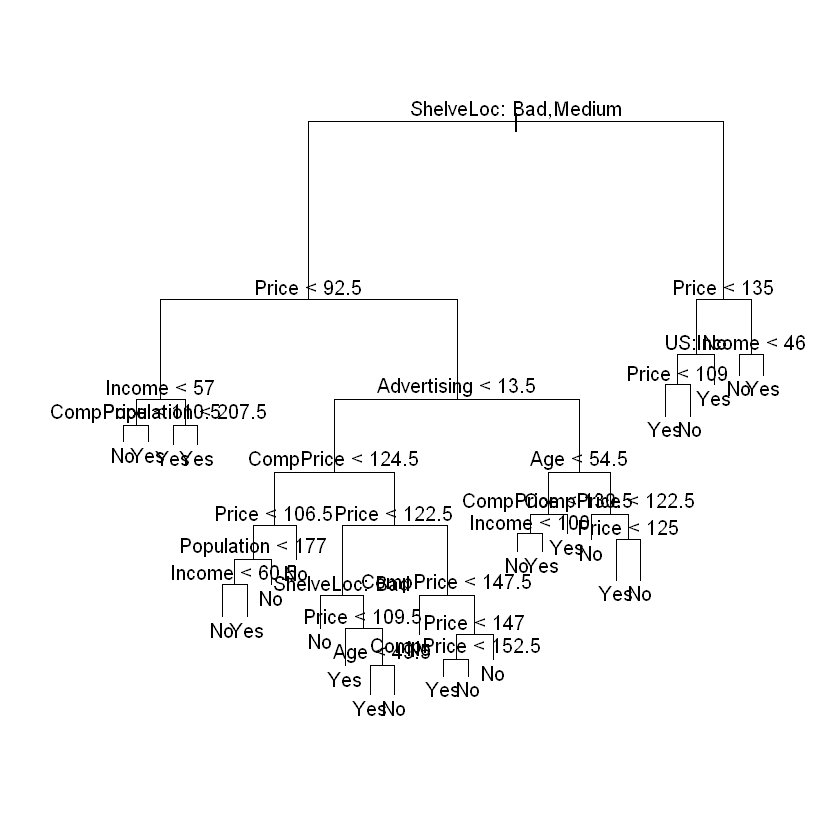

In [6]:
plot(tree.carseats)
text(tree.carseats,pretty=0)

In [7]:
tree.carseats

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 400 541.500 No ( 0.59000 0.41000 )  
    2) ShelveLoc: Bad,Medium 315 390.600 No ( 0.68889 0.31111 )  
      4) Price < 92.5 46  56.530 Yes ( 0.30435 0.69565 )  
        8) Income < 57 10  12.220 No ( 0.70000 0.30000 )  
         16) CompPrice < 110.5 5   0.000 No ( 1.00000 0.00000 ) *
         17) CompPrice > 110.5 5   6.730 Yes ( 0.40000 0.60000 ) *
        9) Income > 57 36  35.470 Yes ( 0.19444 0.80556 )  
         18) Population < 207.5 16  21.170 Yes ( 0.37500 0.62500 ) *
         19) Population > 207.5 20   7.941 Yes ( 0.05000 0.95000 ) *
      5) Price > 92.5 269 299.800 No ( 0.75465 0.24535 )  
       10) Advertising < 13.5 224 213.200 No ( 0.81696 0.18304 )  
         20) CompPrice < 124.5 96  44.890 No ( 0.93750 0.06250 )  
           40) Price < 106.5 38  33.150 No ( 0.84211 0.15789 )  
             80) Population < 177 12  16.300 No ( 0.58333 0.41667 )  
              160) Income < 60.5 6   0

Create training / test set split, to estimate performance on independent test set

In [8]:
set.seed(2)
train=sample(1:nrow(Carseats), 200)   # create training set with 200 samples (half of total)
Carseats.test=Carseats[-train,]       # create test set with other samples
High.test=High[-train]
tree.carseats=tree(High~.-Sales,Carseats,subset=train)
tree.pred=predict(tree.carseats,Carseats.test,type="class")
table(tree.pred,High.test)
(86+57)/200

         High.test
tree.pred No Yes
      No  86  27
      Yes 30  57

[1] 0.715

Use cross-validation to estimate test error for different pruning strengths

The output for the CV is:
* size: number of terminal nodes |T|
* dev: CV error rate (confusing name!)
* k: alpha value  (-Inf must be error: 0 is lowest sensible value
* attr: attributes of class

In [9]:
set.seed(3)
cv.carseats=cv.tree(tree.carseats,FUN=prune.misclass)   # we prune with missclassification error rate
names(cv.carseats)
cv.carseats

[1] "size"   "dev"    "k"      "method"

$size
[1] 19 17 14 13  9  7  3  2  1

$dev
[1] 55 55 53 52 50 56 69 65 80

$k
[1]       -Inf  0.0000000  0.6666667  1.0000000  1.7500000  2.0000000  4.2500000
[8]  5.0000000 23.0000000

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

plot of missclassification error 

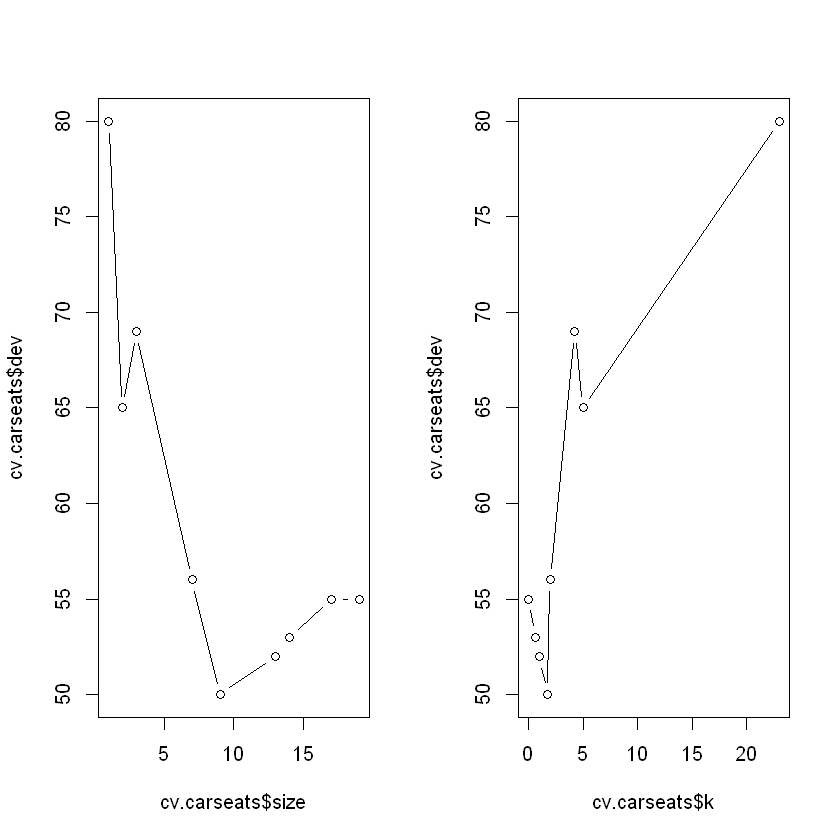

In [10]:
par(mfrow=c(1,2))
plot(cv.carseats$size,cv.carseats$dev,type="b")
plot(cv.carseats$k,cv.carseats$dev,type="b")

Prune the tree to its optimal size, and plot the final result

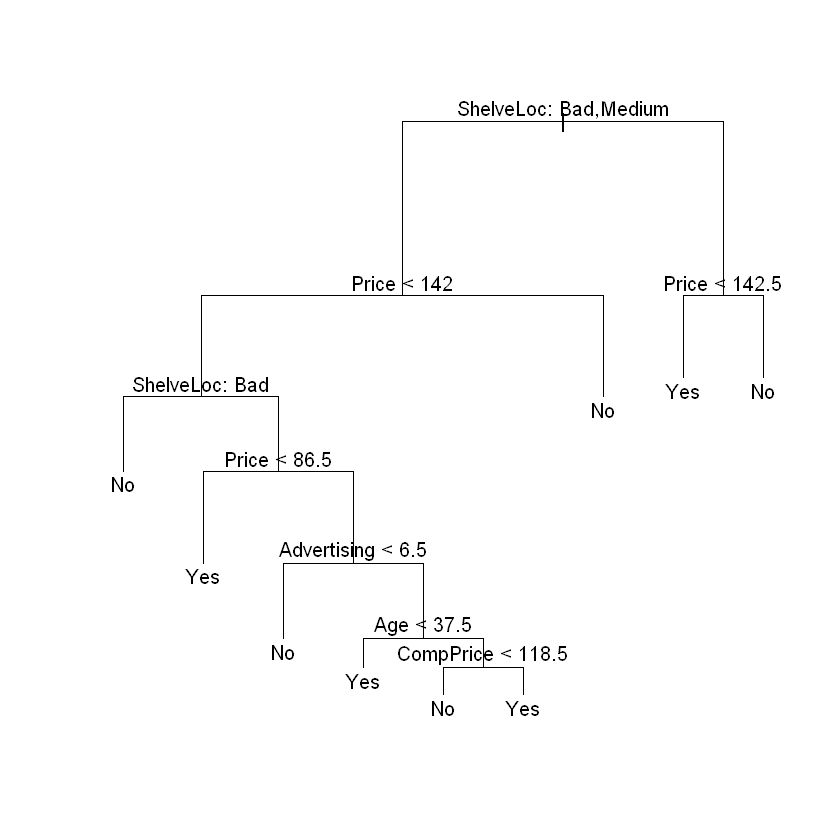

In [12]:
prune.carseats=prune.misclass(tree.carseats,best=9)
plot(prune.carseats)
text(prune.carseats,pretty=0)

Quality of pruned tree on test set (bettern than 0.72 of unpruned tree)

In [13]:
tree.pred=predict(prune.carseats,Carseats.test,type="class")
table(tree.pred,High.test)
(94+60)/200

         High.test
tree.pred No Yes
      No  94  24
      Yes 22  60

[1] 0.77

Indeed, a larger tree with 15 terminal nodes performs worse

         High.test
tree.pred No Yes
      No  86  22
      Yes 30  62

[1] 0.74

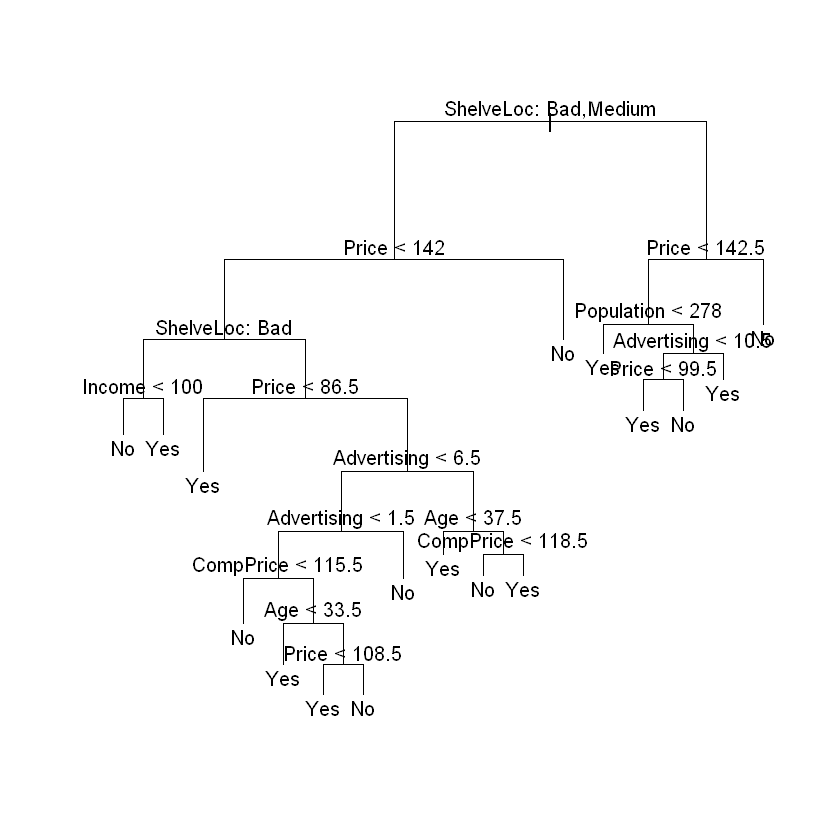

In [14]:
prune.carseats=prune.misclass(tree.carseats,best=15)
plot(prune.carseats)
text(prune.carseats,pretty=0)
tree.pred=predict(prune.carseats,Carseats.test,type="class")
table(tree.pred,High.test)
(86+62)/200

**Fitting regression trees**

We fit a regression tree to the Boston data set. It consists of
* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 dollar
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in 1000's dollar

In [15]:
library(MASS)
set.seed(1)
train = sample(1:nrow(Boston), nrow(Boston)/2)
tree.boston=tree(medv~.,Boston,subset=train)
summary(tree.boston)

Warning message:
"package 'MASS' was built under R version 3.5.3"


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = train)
Variables actually used in tree construction:
[1] "lstat" "rm"    "dis"  
Number of terminal nodes:  8 
Residual mean deviance:  12.65 = 3099 / 245 
Distribution of residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-14.10000  -2.04200  -0.05357   0.00000   1.96000  12.60000 

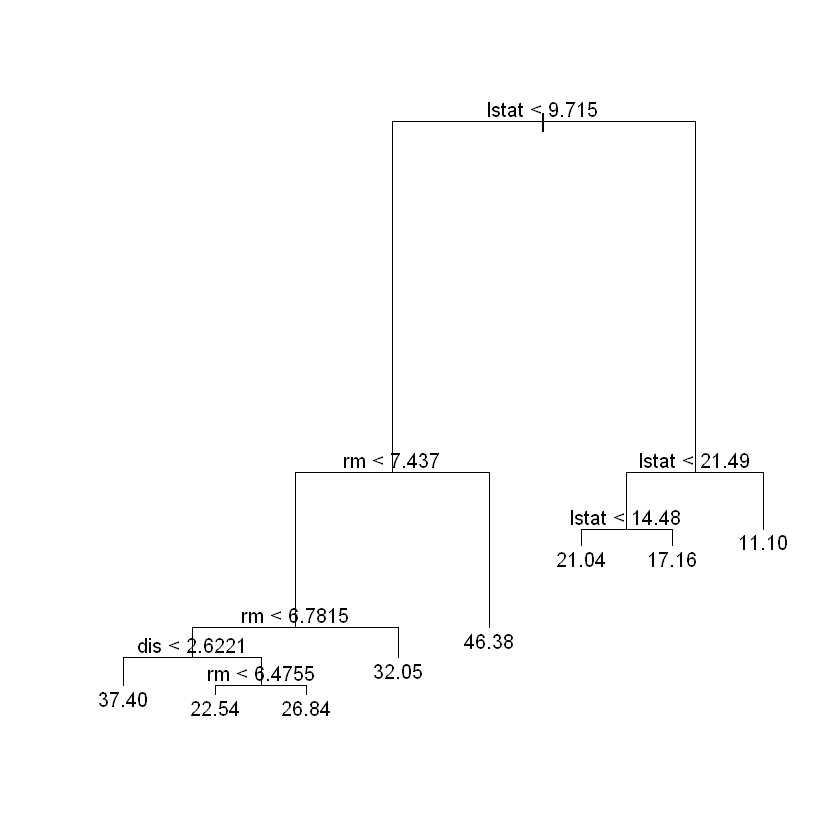

In [16]:
plot(tree.boston)
text(tree.boston,pretty=0)

The most complex tree is selected by cross-validation.

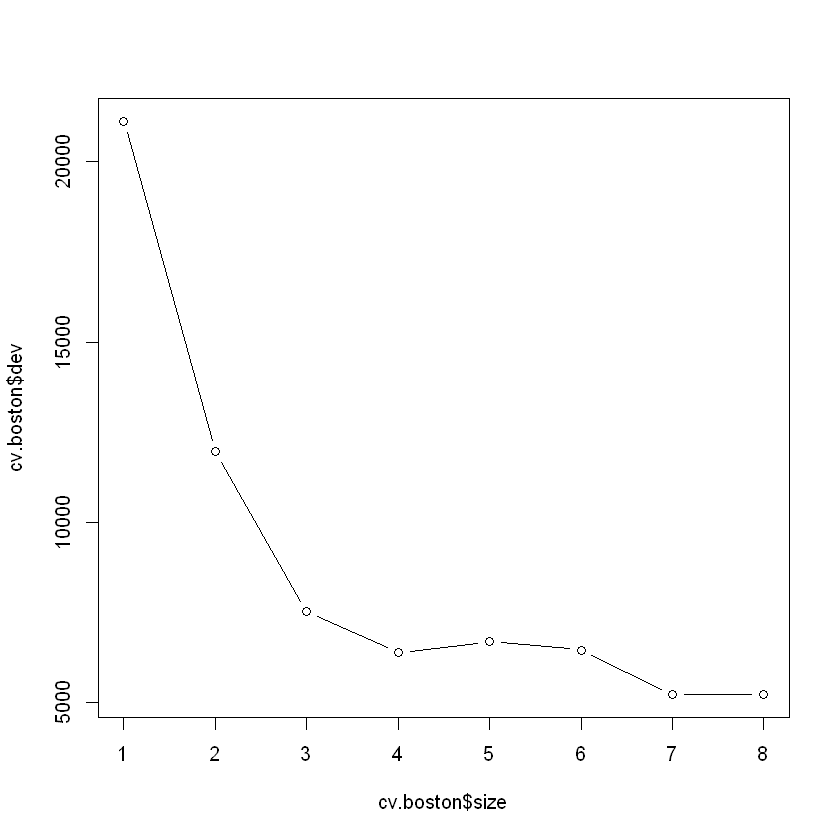

In [17]:
cv.boston=cv.tree(tree.boston)
plot(cv.boston$size,cv.boston$dev,type='b')

Prune the tree anyway.

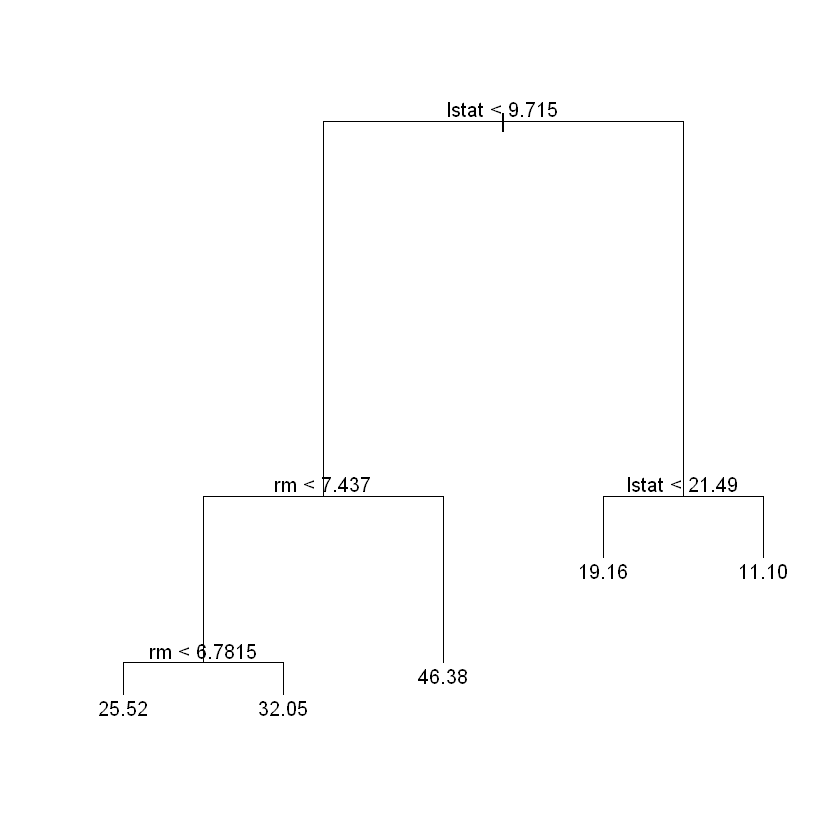

In [18]:
prune.boston=prune.tree(tree.boston,best=5)
plot(prune.boston)
text(prune.boston,pretty=0)

[1] 25.04559

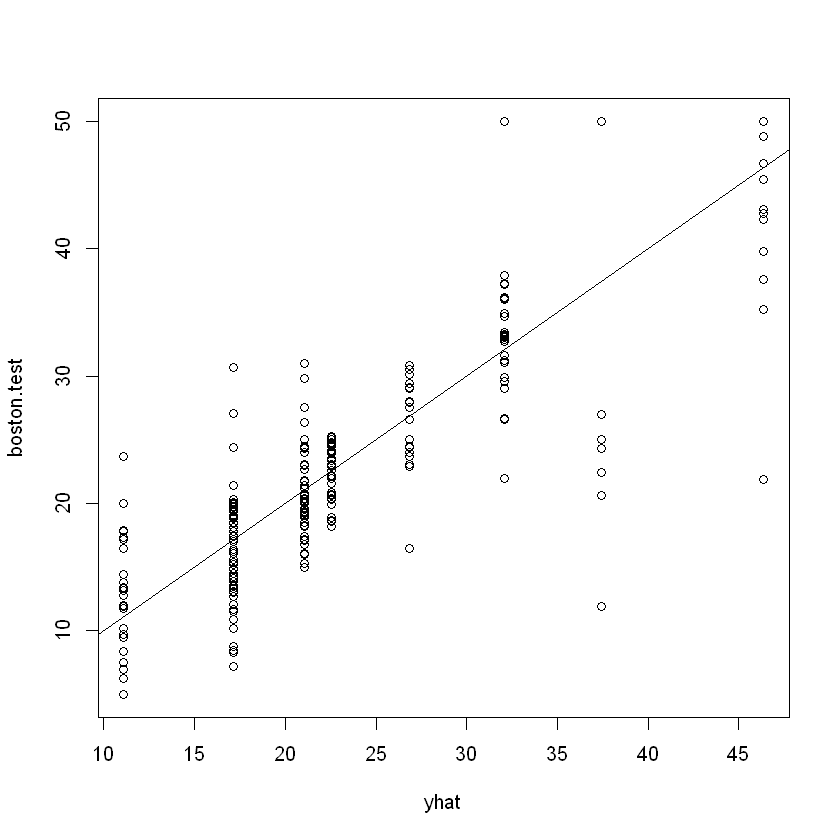

In [19]:
yhat=predict(tree.boston,newdata=Boston[-train,])
boston.test=Boston[-train,"medv"]
plot(yhat,boston.test)
abline(0,1)  # line with intercept 0 and slope 1
mean((yhat-boston.test)^2)

**Bagging and Random Forests**

Note that bagging is just a random forest with m=p.

In [20]:
library(randomForest)
set.seed(1)
bag.boston=randomForest(medv~.,data=Boston,subset=train,mtry=13,importance=TRUE)
bag.boston

Warning message:
"package 'randomForest' was built under R version 3.5.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.



Call:
 randomForest(formula = medv ~ ., data = Boston, mtry = 13, importance = TRUE,      subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 13

          Mean of squared residuals: 11.15723
                    % Var explained: 86.49

Already much better compared with a single pruned tree. (Half the MSE)

[1] 13.50808

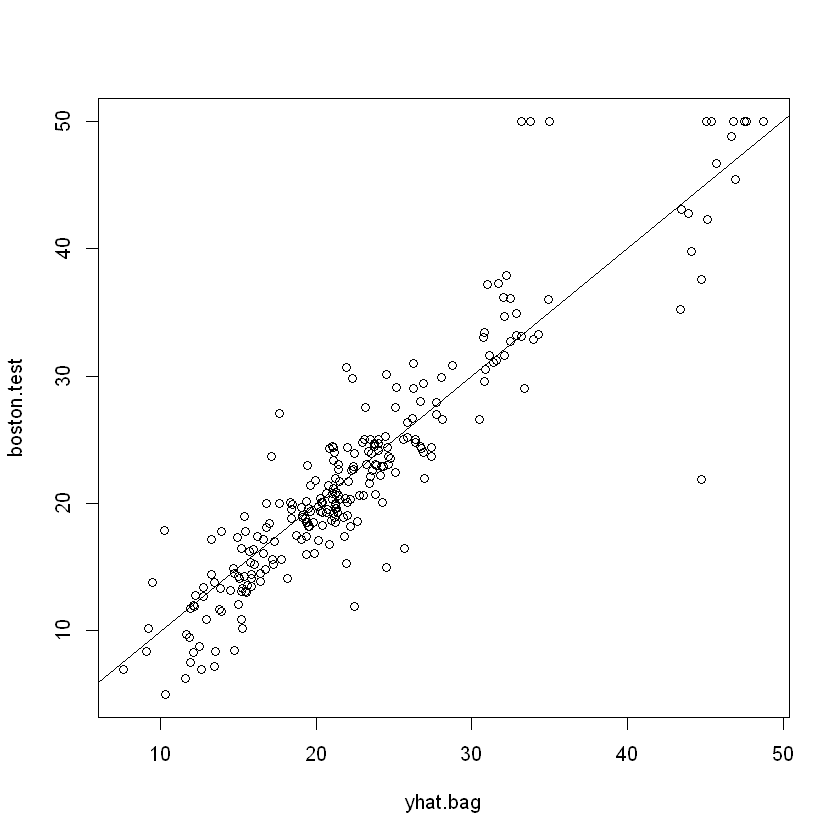

In [21]:
yhat.bag = predict(bag.boston,newdata=Boston[-train,])
plot(yhat.bag, boston.test)
abline(0,1)
mean((yhat.bag-boston.test)^2)

Bagging with less trees reduces performance (MSE goes up).

In [22]:
bag.boston=randomForest(medv~.,data=Boston,subset=train,mtry=13,ntree=25)
yhat.bag = predict(bag.boston,newdata=Boston[-train,])
mean((yhat.bag-boston.test)^2)

[1] 13.94835

We now use a random forest, by changing mtry = 6 (instead of all predictors mtry = 13).
Performance further improves.

In [23]:
set.seed(1)
rf.boston=randomForest(medv~.,data=Boston,subset=train,mtry=6,importance=TRUE)
yhat.rf = predict(rf.boston,newdata=Boston[-train,])
mean((yhat.rf-boston.test)^2)

[1] 11.66454

In [24]:
importance(rf.boston)

,%IncMSE,IncNodePurity
crim,12.132320,986.50338
zn,1.955579,57.96945
indus,9.069302,882.78261
chas,2.210835,45.22941
nox,11.104823,1044.33776
rm,31.784033,6359.31971
age,10.962684,516.82969
dis,15.015236,1224.11605
rad,4.118011,95.94586
tax,8.587932,502.96719


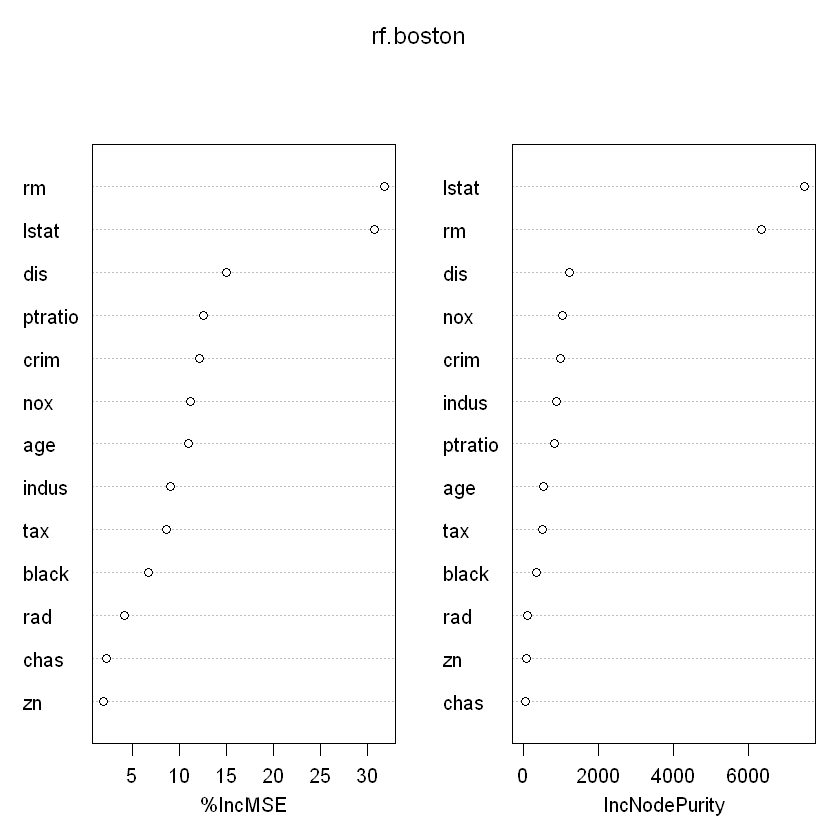

In [25]:
varImpPlot(rf.boston)

**Boosting**

We now use boosting on the Boston data set.

In [26]:
library(gbm)
set.seed(1)
boost.boston=gbm(medv~.,data=Boston[train,],distribution="gaussian",n.trees=5000,interaction.depth=4)

Warning message:
"package 'gbm' was built under R version 3.5.3"Loaded gbm 2.1.5


Relative influence is the average improvement (depends on the metric) of all splits containing that variable

,var,rel.inf
lstat,lstat,37.0661275
rm,rm,25.3533123
dis,dis,11.7903016
crim,crim,8.0388750
black,black,4.2531659
nox,nox,3.5058570
age,age,3.4868724
ptratio,ptratio,2.2500385
indus,indus,1.7725070
tax,tax,1.1836592


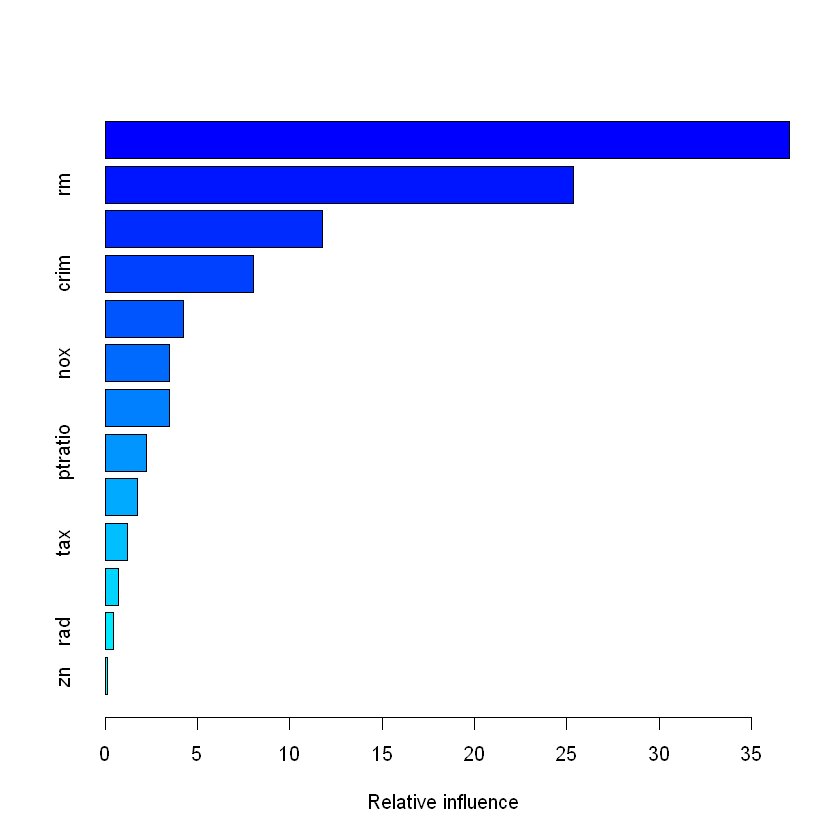

In [27]:
summary(boost.boston)

partial dependence plots: see https://christophm.github.io/interpretable-ml-book/pdp.html
integrate out the effect of other variables: f(X_s) = int f(X_s, X_c) dP(X_c) 

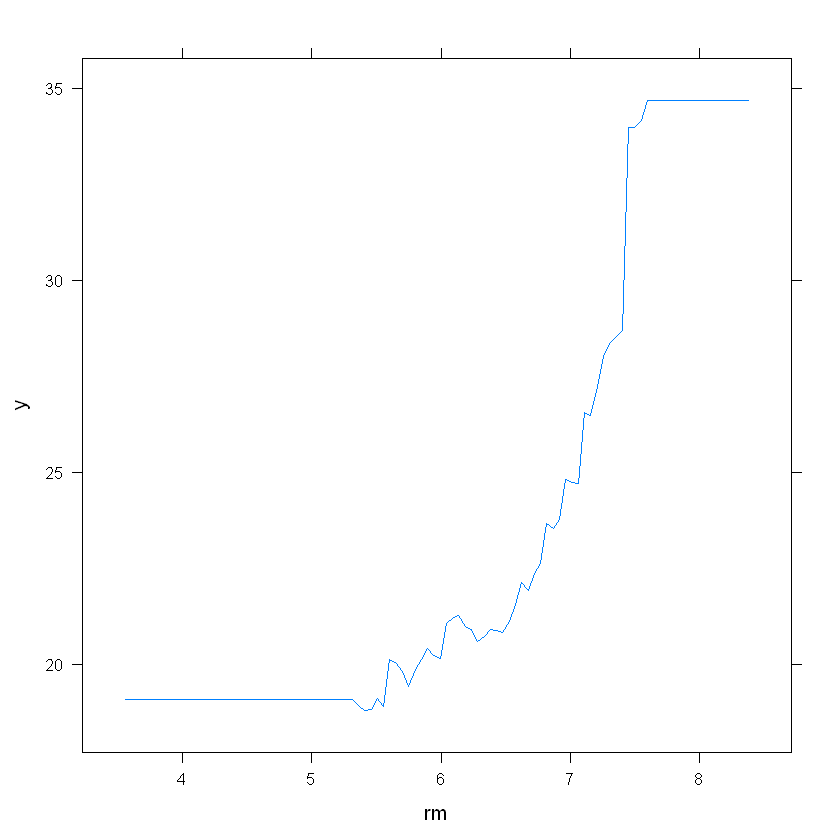

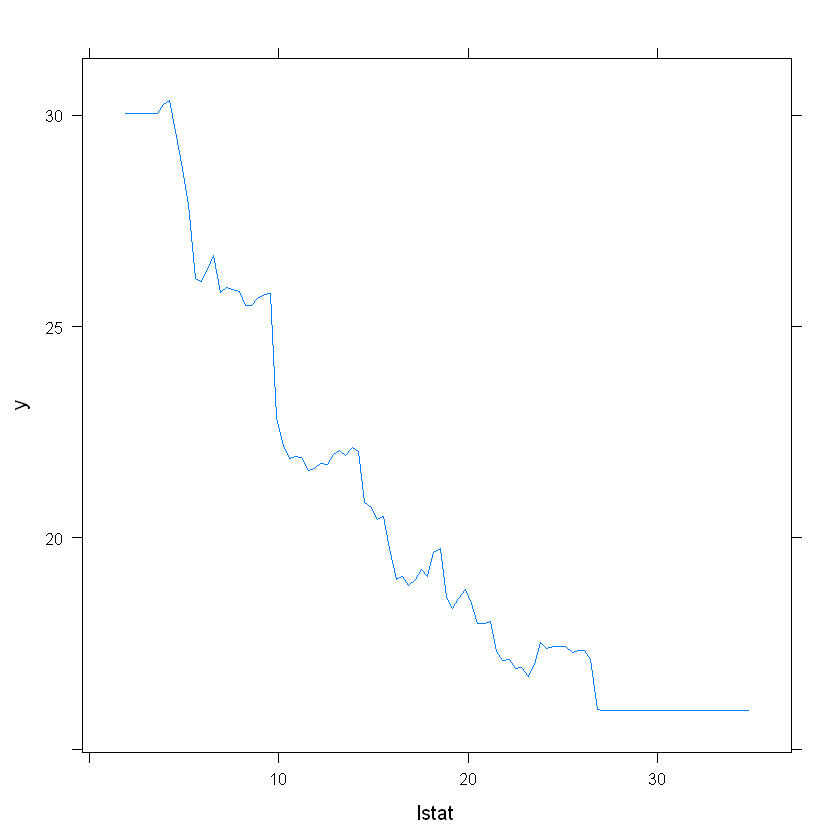

In [28]:
par(mfrow=c(1,2))
plot(boost.boston,i="rm")
plot(boost.boston,i="lstat")

Better performance compared to boosting.
This dependence on randomness, so results can vary (could also lead to similar performance).
$\lambda = 0.001$ in this case.

In [29]:
yhat.boost=predict(boost.boston,newdata=Boston[-train,],n.trees=5000)
mean((yhat.boost-boston.test)^2)

[1] 10.81479

By taking $\lambda = 0.2$, test performance gets worse.

In [30]:
boost.boston=gbm(medv~.,data=Boston[train,],distribution="gaussian",n.trees=5000,interaction.depth=4,shrinkage=0.2,verbose=F)
yhat.boost=predict(boost.boston,newdata=Boston[-train,],n.trees=5000)
mean((yhat.boost-boston.test)^2)

[1] 11.51109

Eerste 2 oefeningen van boek kunnen ook gemaakt worden